<a id='section1'></a>
## Importing data & libraries

In [1]:
agb_data_path = "raw/veg_2010_2016/all_veg_data.nc"

In [2]:
import xarray as xr
import numpy
import os
import matplotlib.pyplot as plt

In [3]:
"""Load AGB data into an xarray dataset"""
agb_data = xr.open_dataset(agb_data_path)

In [4]:
print(agb_data)

<xarray.Dataset>
Dimensions:                (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time                   (time) datetime64[ns] 2010-01-01 ... 2016-12-01
  * longitude              (longitude) float32 -179.9 -179.6 ... 179.6 179.9
  * latitude               (latitude) float32 -89.88 -89.62 ... 89.62 89.88
Data variables:
    abg_avitabile_vod5th   (time, latitude, longitude) float64 ...
    abg_avitabile_vodmean  (time, latitude, longitude) float64 ...
    abg_avitabile_vod95th  (time, latitude, longitude) float64 ...
    abg_baccini_vod5th     (time, latitude, longitude) float64 ...
    abg_baccini_vodmean    (time, latitude, longitude) float64 ...
    abg_baccini_vod95th    (time, latitude, longitude) float64 ...
    abg_saatchi_vod5th     (time, latitude, longitude) float64 ...
    abg_saatchi_vodmean    (time, latitude, longitude) float64 ...
    abg_saatchi_vod95th    (time, latitude, longitude) float64 ...


<a id='section2'></a>
## Pre-processing of Above Ground Biomass (AGB) 

### Droping features that are not required

In [5]:
agb_data = agb_data.drop(["abg_baccini_vod5th","abg_baccini_vodmean","abg_baccini_vod95th","abg_saatchi_vod5th","abg_saatchi_vodmean","abg_saatchi_vod95th"])

### Dataset after pre-processing

In [6]:
print(agb_data)

<xarray.Dataset>
Dimensions:                (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time                   (time) datetime64[ns] 2010-01-01 ... 2016-12-01
  * longitude              (longitude) float32 -179.9 -179.6 ... 179.6 179.9
  * latitude               (latitude) float32 -89.88 -89.62 ... 89.62 89.88
Data variables:
    abg_avitabile_vod5th   (time, latitude, longitude) float64 ...
    abg_avitabile_vodmean  (time, latitude, longitude) float64 ...
    abg_avitabile_vod95th  (time, latitude, longitude) float64 ...


In [7]:
#Pandas describe method
print(agb_data.to_dataframe().describe())

       abg_avitabile_vod5th  abg_avitabile_vodmean  abg_avitabile_vod95th
count          1.162370e+07           1.162370e+07           1.162370e+07
mean           2.216107e+01           5.017954e+01           9.721972e+01
std            5.761816e+01           9.014966e+01           1.402591e+02
min            0.000000e+00           0.000000e+00           0.000000e+00
25%            0.000000e+00           1.299340e+00           4.685758e+00
50%            2.133812e+00           1.127245e+01           2.447309e+01
75%            1.186341e+01           4.736213e+01           1.282035e+02
max            2.787640e+02           3.873029e+02           4.803394e+02


### Plots

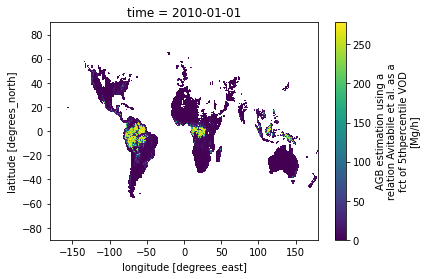

In [8]:
agb_data.abg_avitabile_vod5th[0].plot()

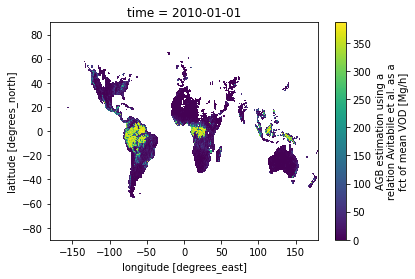

In [9]:
agb_data.abg_avitabile_vodmean[0].plot()

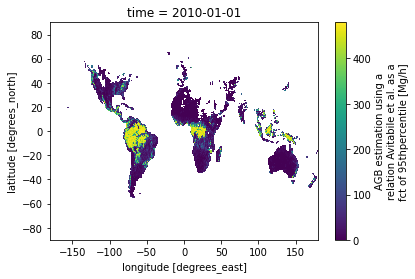

In [10]:
agb_data.abg_avitabile_vod95th[0].plot()

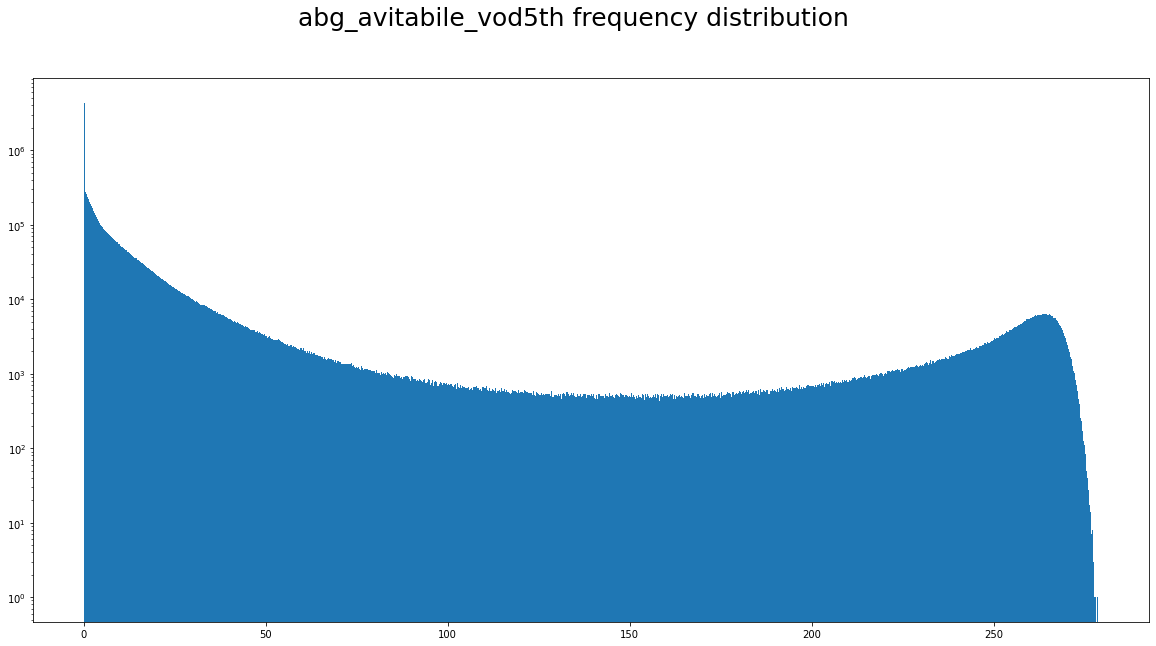

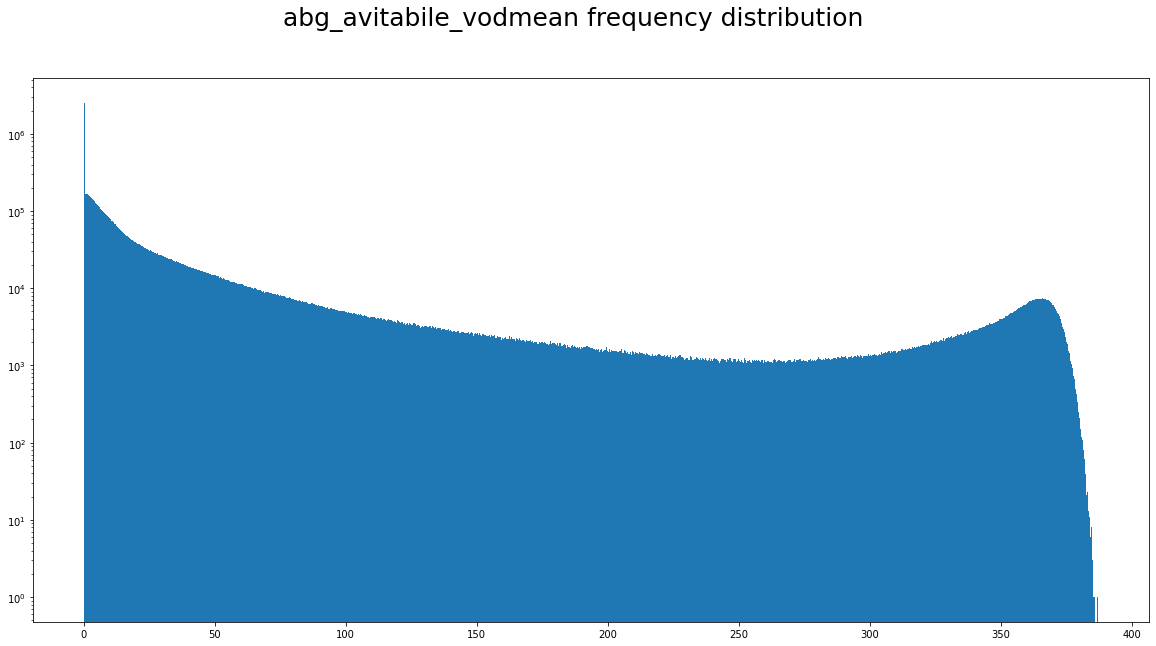

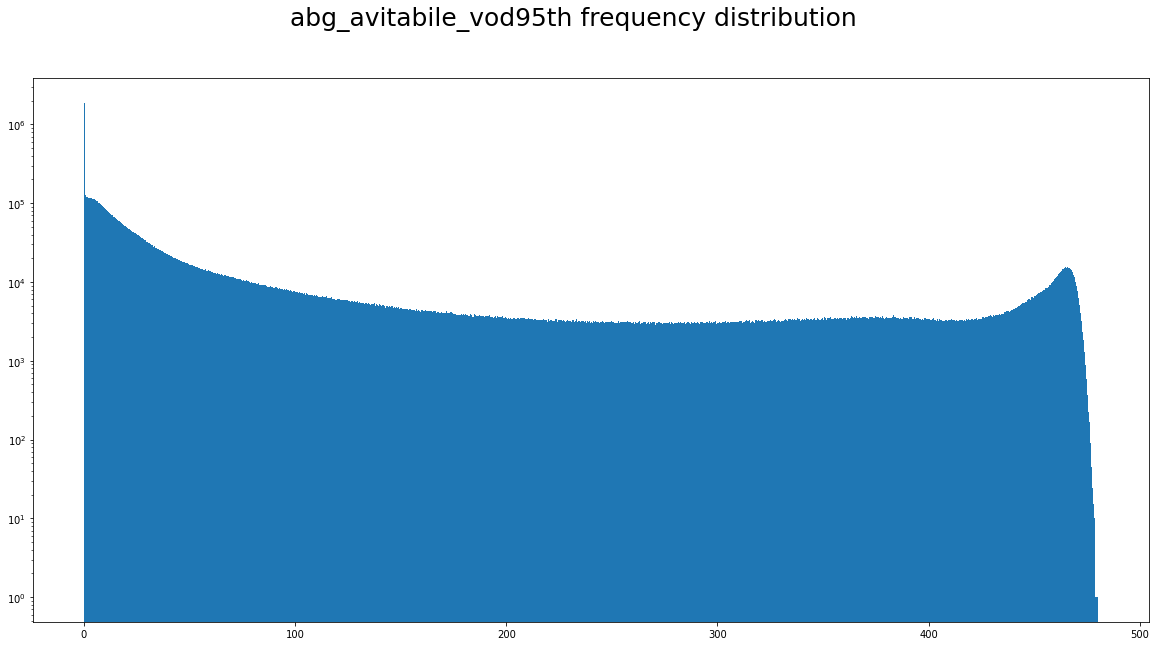

In [11]:
var_list =['abg_avitabile_vod5th', 'abg_avitabile_vodmean', 'abg_avitabile_vod95th']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(agb_data[list(agb_data.data_vars)[i]].values.flatten(), bins=1000, cumulative=False, log=True)

### Saving pre-processed file

In [12]:
agb_data.to_netcdf("preprocess/agb_avitabile_2010-2016_v3.nc")

In [13]:
#File size
print(os.stat("preprocess/agb_avitabile_2010-2016_v3.nc").st_size/1e9,"GB")

2.090212886 GB
